In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization



import warnings # Supress warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("./files/Aquifer_Petrignano.csv")
df.index = pd.to_datetime(df.Date, format = '%d/%m/%Y', )
df = df.drop(['Date'], axis=1)

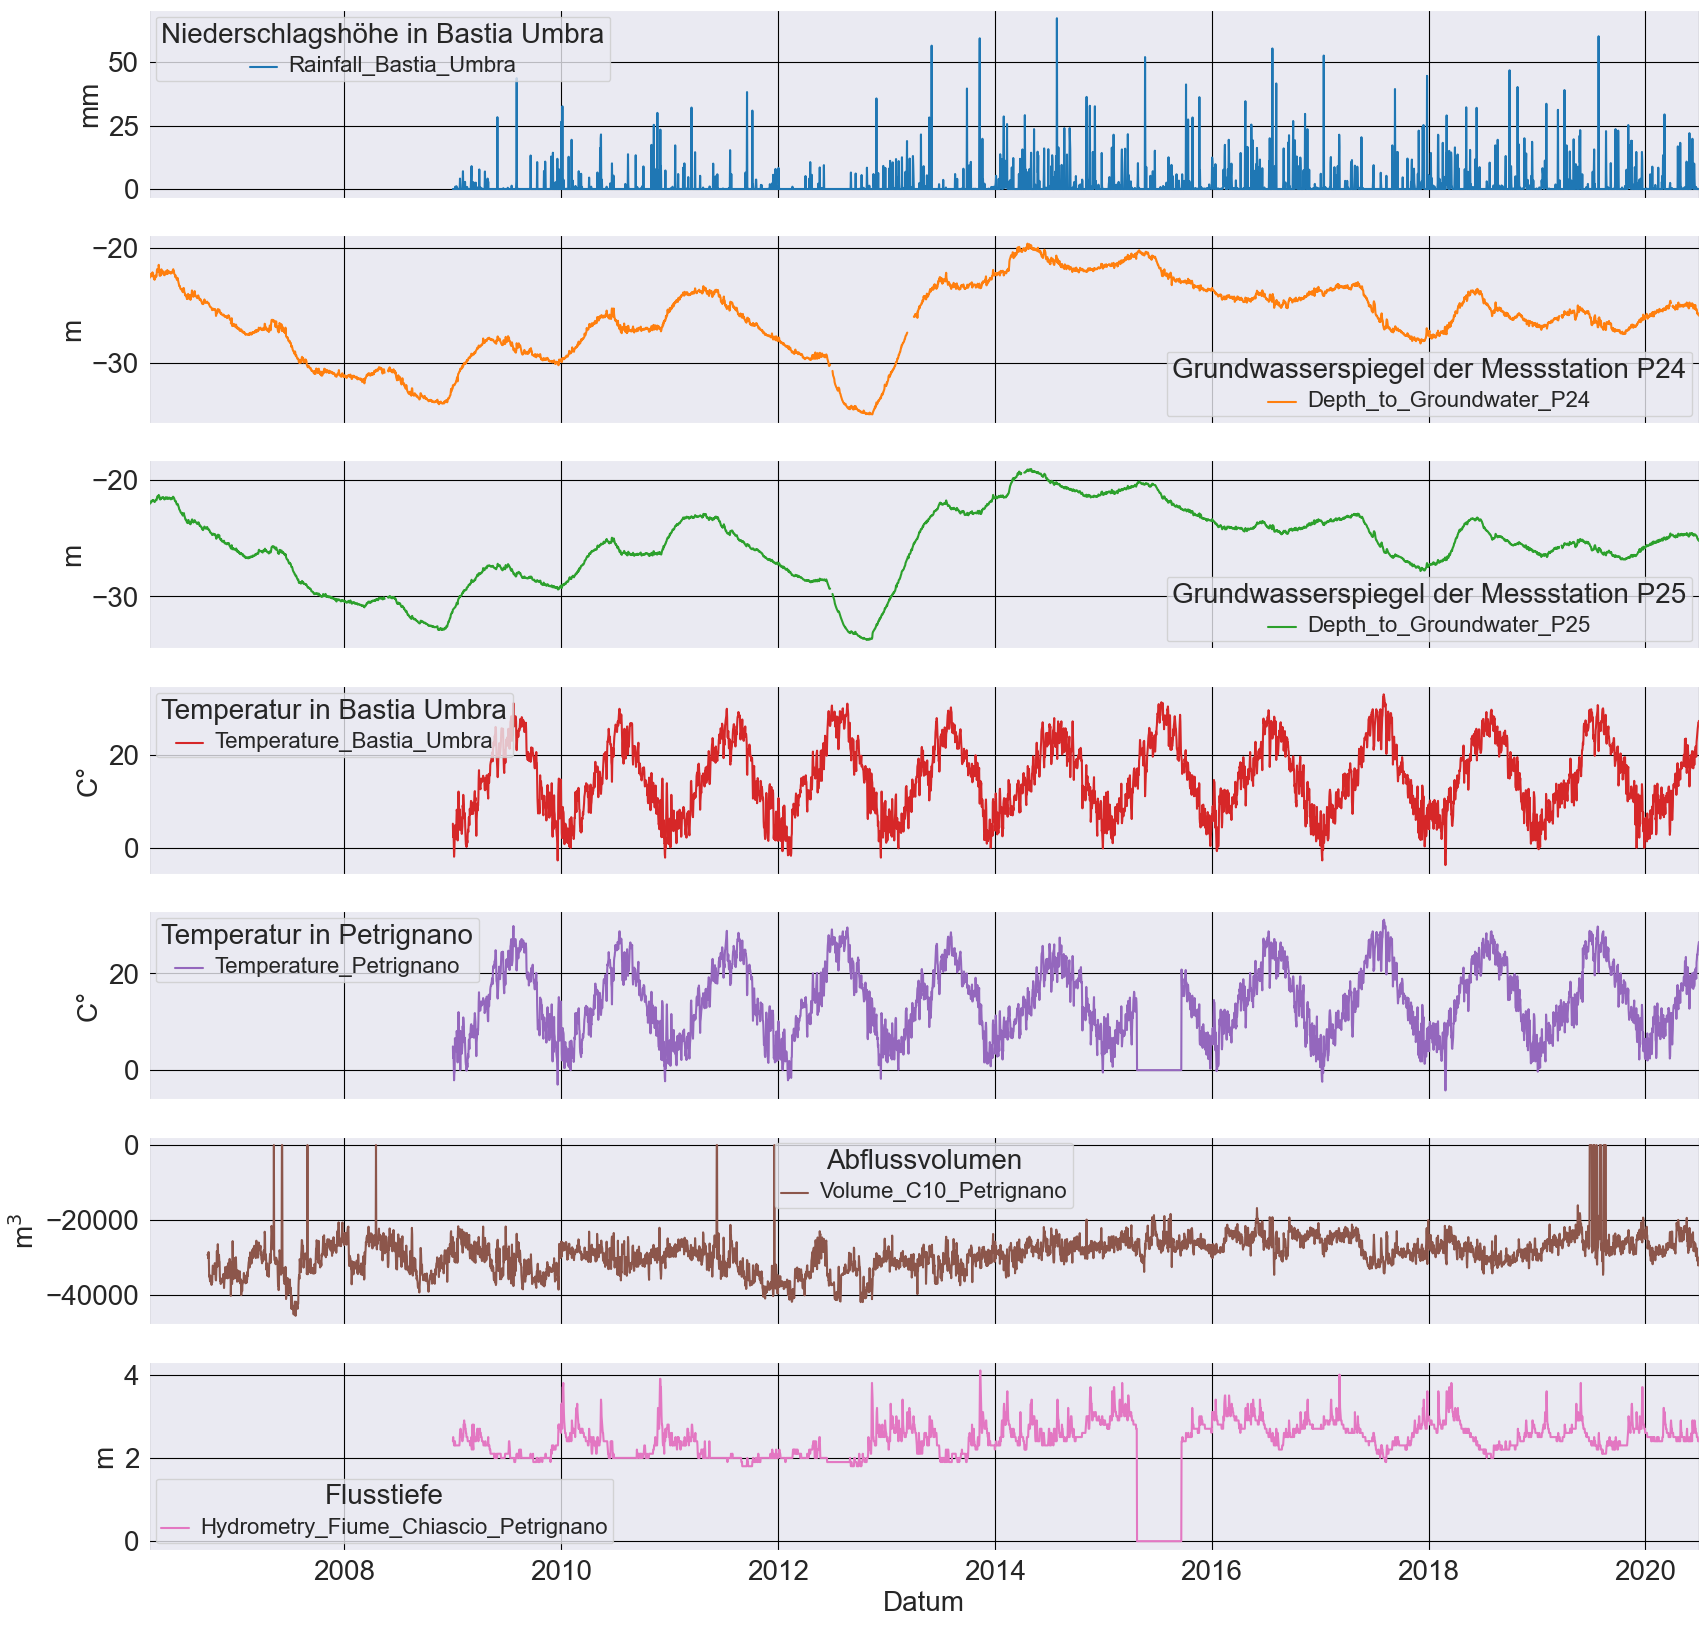

In [3]:


subplots = df.plot(subplots=True, figsize=(20, 20))
y_labels = ['mm', 'm', 'm', 'C°', 'C°', 'm$^3$', 'm']
legend_titles = ['Niederschlagshöhe in Bastia Umbra', 'Grundwasserspiegel der Messstation P24', 'Grundwasserspiegel der Messstation P25', 'Temperatur in Bastia Umbra', 'Temperatur in Petrignano', 'Abflussvolumen', 'Flusstiefe']
for i, ax in enumerate(subplots):
    ax.set_xlabel("Datum", fontsize=20)  # Change 'X Label' to your desired label
    ax.set_ylabel(y_labels[i], fontsize=20)  # Change 'Y Label' to your desired label
    ax.tick_params(axis='both', which='major', labelsize=20, grid_color='k')
    # Adjust font size for legend
    legend = ax.legend()
    if legend:
        legend.set_title(legend_titles[i], prop={'size': 20})  # Change 'Legend' to your desired legend title
        for text in legend.texts:
            text.set_fontsize(16)
#plt.savefig('graphs/rawdata.png', format='png', transparent=True)

In [43]:
df = pd.read_csv("./files/interpolated_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

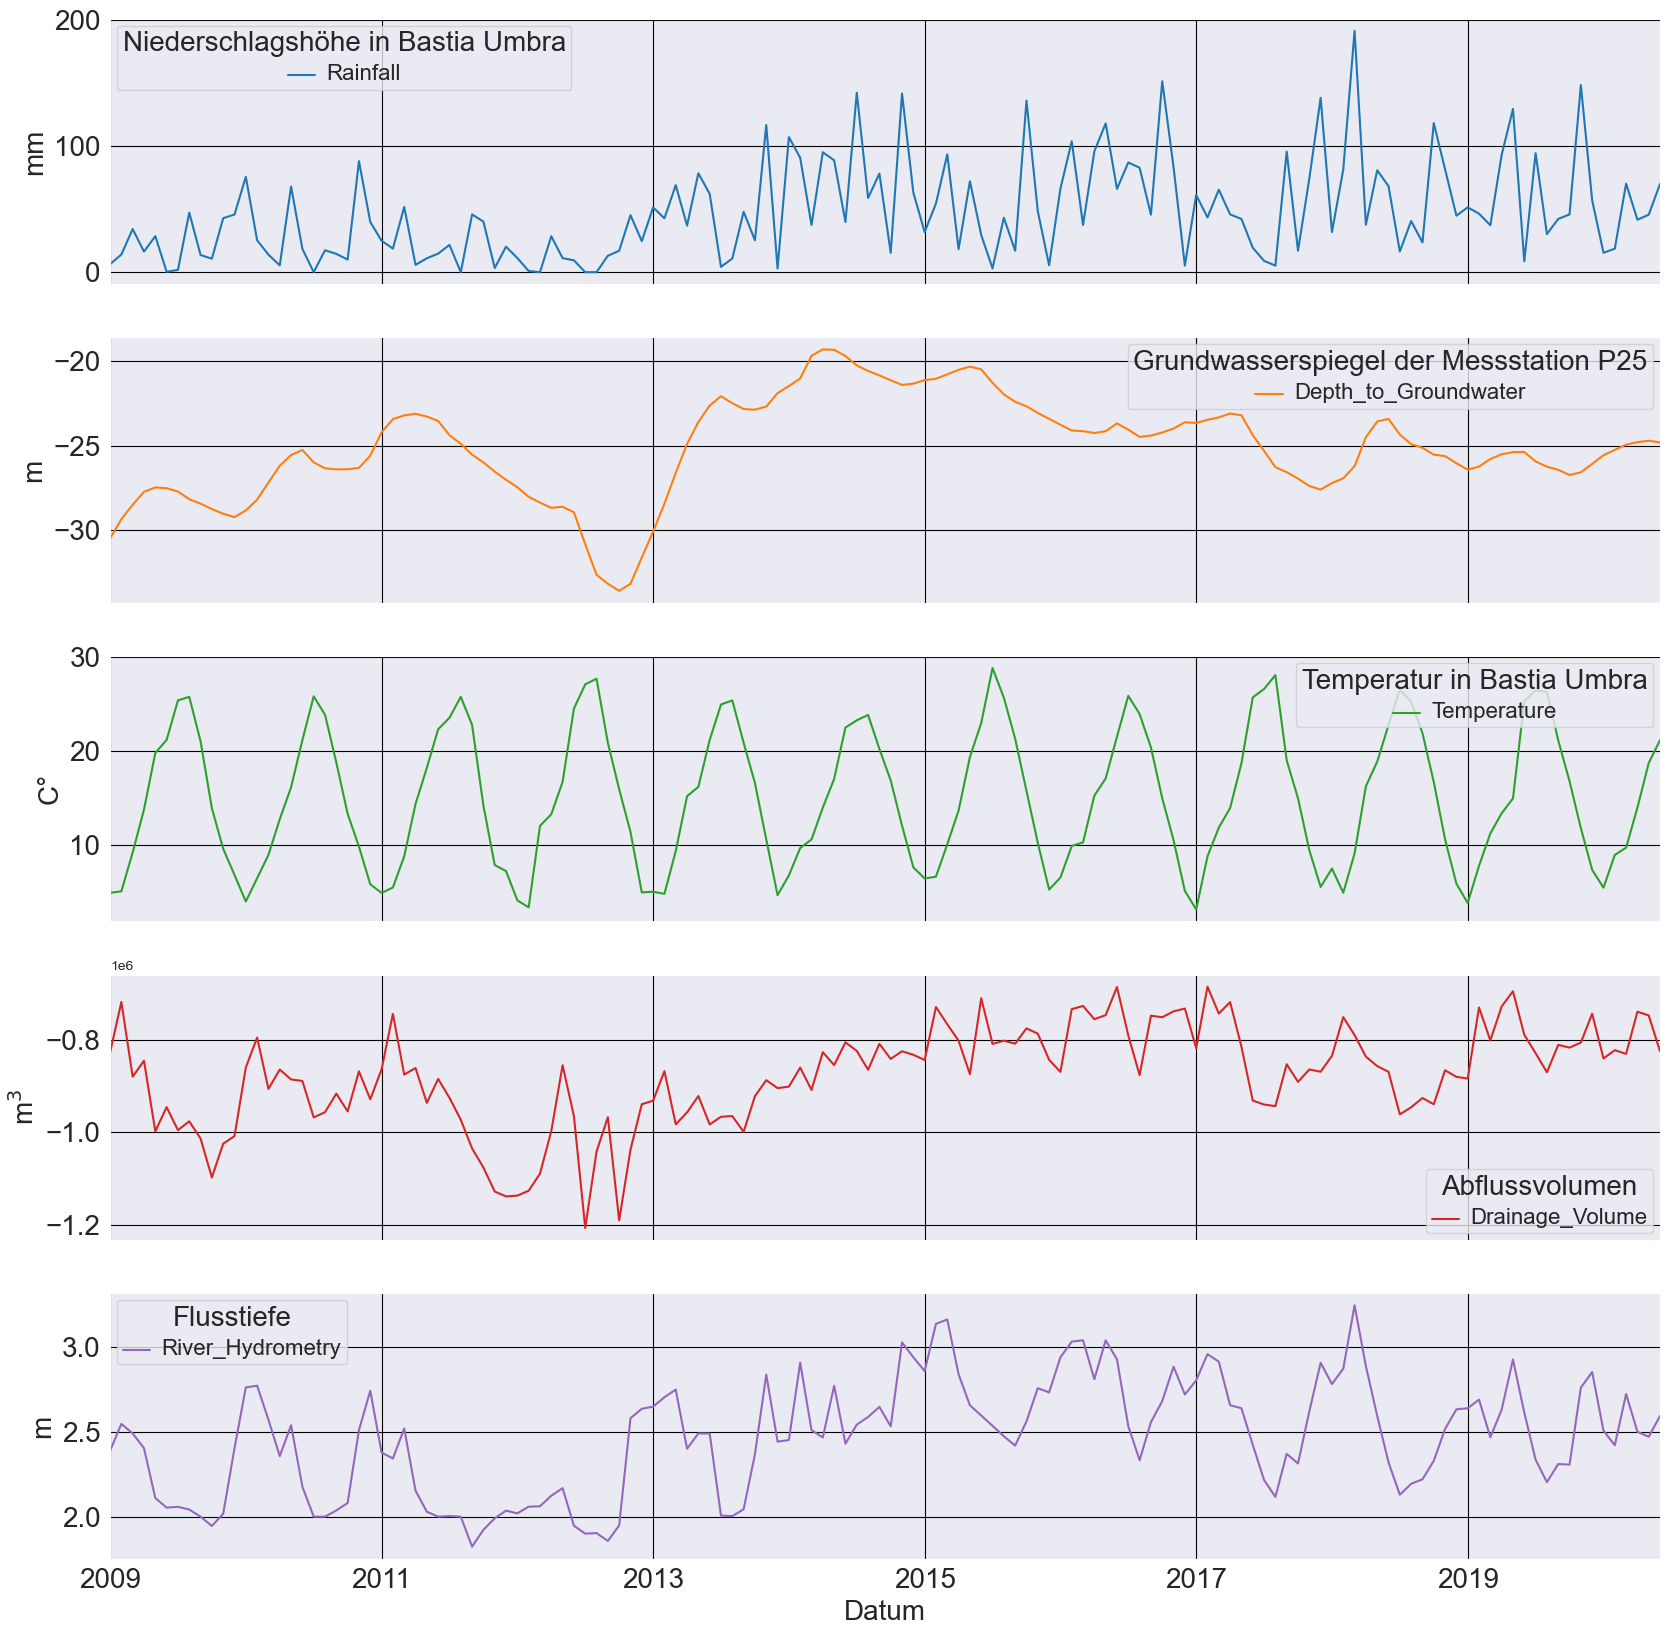

In [44]:
subplots = df.plot(subplots=True, figsize=(20, 20))
y_labels = ['mm', 'm', 'C°', 'm$^3$', 'm']
legend_titles = ['Niederschlagshöhe in Bastia Umbra', 'Grundwasserspiegel der Messstation P25', 'Temperatur in Bastia Umbra', 'Abflussvolumen', 'Flusstiefe']
for i, ax in enumerate(subplots):
    ax.set_xlabel("Datum", fontsize=20)  # Change 'X Label' to your desired label
    ax.set_ylabel(y_labels[i], fontsize=20)  # Change 'Y Label' to your desired label
    ax.tick_params(axis='both', which='major', labelsize=20, grid_color='k')
    # Adjust font size for legend
    legend = ax.legend()
    if legend:
        legend.set_title(legend_titles[i], prop={'size': 20})  # Change 'Legend' to your desired legend title
        for text in legend.texts:
            text.set_fontsize(16)
#plt.savefig('graphs/plaindata_w.png', format='png', transparent=True)

In [10]:
df = pd.read_csv("./files/scaled_data.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

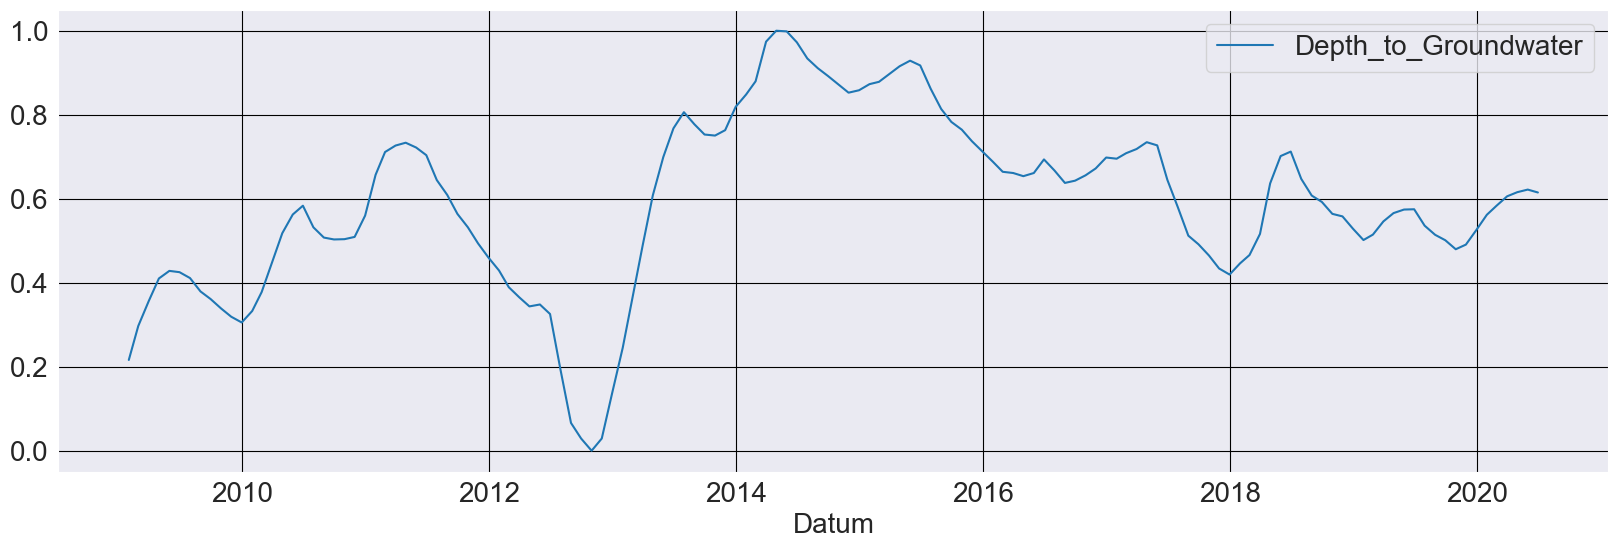

In [15]:
column_name = 'Depth_to_Groundwater'
plt.figure(figsize=(20, 6))  # Adjust the figsize as needed
plt.plot(df.index, df[column_name])  # Assuming the index represents the x-axis
plt.xlabel("Datum", fontsize=20)  # Change 'Datum' to your desired x-axis label
plt.tick_params(axis='both',  labelsize=20, grid_color='k')

# Set up the legend
plt.legend([column_name], prop={'size': 20})  # Use the column name as the legend label

plt.savefig('graphs/6.png', format='png', transparent=True)
plt.show()

In [32]:
num = 5
df = pd.read_csv("./files/scaled_w.csv", index_col=0)
pred_arima = pd.read_csv("./predictions/ARIMAX/"+str(num)+".csv", index_col=0)
pred_sarima = pd.read_csv("./predictions/SARIMAX/"+str(num)+".csv", index_col=0)
pred_rnn = pd.read_csv("./predictions/RNN/"+str(num)+".csv", index_col=0)
pred_lstm = pd.read_csv("./predictions/LSTM_multi/"+str(num)+".csv", index_col=0)
pred_naive = pd.read_csv("./predictions/naive/"+str(num)+".csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
pred_arima.index = pd.to_datetime(pred_arima.index, format = '%Y-%m-%d')
pred_sarima.index = pd.to_datetime(pred_sarima.index, format = '%Y-%m-%d')
pred_rnn.index = pd.to_datetime(pred_rnn.index, format = '%Y-%m-%d')
pred_lstm.index = pd.to_datetime(pred_lstm.index, format = '%Y-%m-%d')
pred_naive.index = pd.to_datetime(pred_naive.index, format = '%Y-%m-%d')

In [33]:
start_index = pred_arima.index[0]
df_test = df[start_index:]

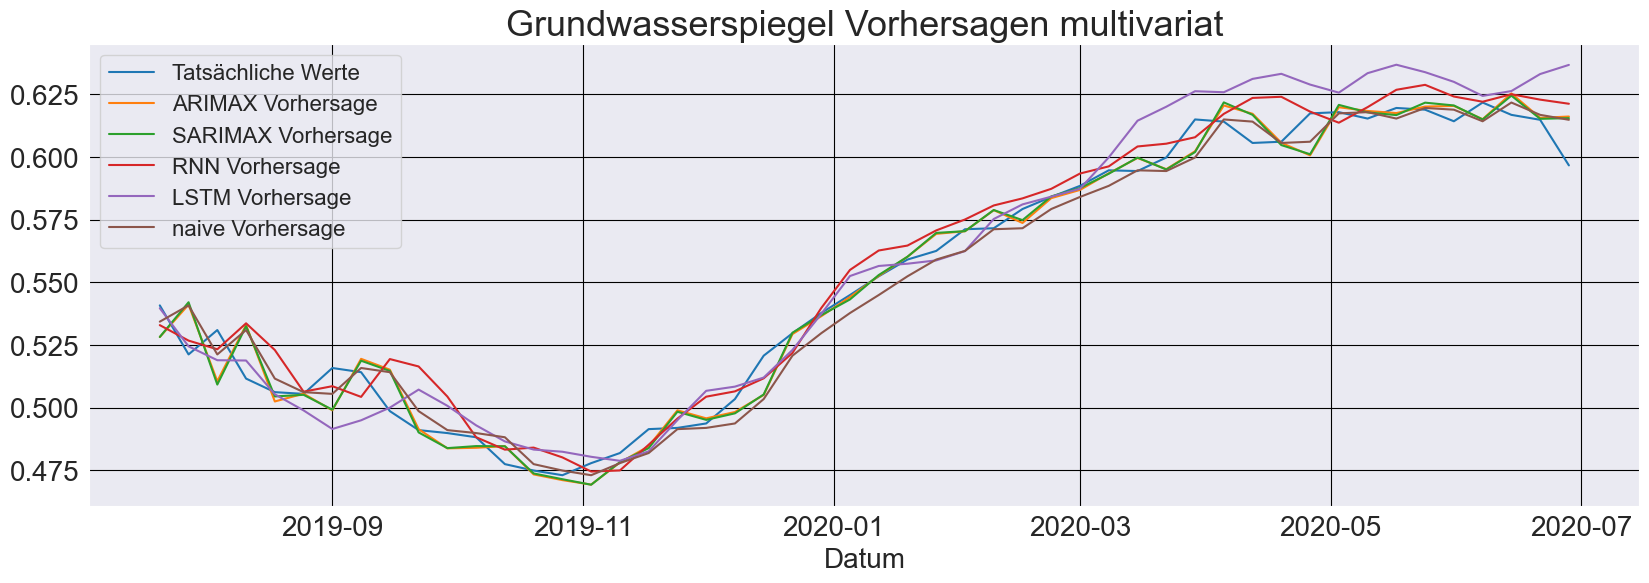

In [40]:
start_date = pd.to_datetime('2019-07-21')
end_date = pd.to_datetime('2020-06-28')

# Use loc to select the specific date range
date_range_df = df.loc[start_date:end_date]
fig, ax = plt.subplots(figsize=(20, 6))
column = 'Depth_to_Groundwater'
ax.plot(df_test[column].loc[start_date:end_date], label='Tatsächliche Werte')
ax.plot(pred_arima[column].loc[start_date:end_date], label='ARIMAX Vorhersage')
ax.plot(pred_sarima[column].loc[start_date:end_date], label='SARIMAX Vorhersage')
ax.plot(pred_rnn[column].loc[start_date:end_date], label='RNN Vorhersage')
ax.plot(pred_lstm[column].loc[start_date:end_date], label='LSTM Vorhersage')
ax.plot(pred_naive[column].loc[start_date:end_date], label='naive Vorhersage')
ax.legend( fontsize=16)
ax.set_xlabel('Datum', fontsize=20)
#ax.set_ylabel('m',  fontsize=20)
ax.tick_params(axis='both', labelsize=20, grid_color='k')
ax.set_title('Grundwasserspiegel Vorhersagen multivariat', fontsize=26)
plt.savefig('graphs/multivar.png', format='png', transparent=True)
plt.show()

In [36]:
pred_arima

,Depth_to_Groundwater
2017-01-29,0.685799
2017-02-05,0.694967
2017-02-12,0.704307
2017-02-19,0.700253
2017-02-26,0.700967
...,...
2020-05-31,0.620409
2020-06-07,0.615097
2020-06-14,0.625376
2020-06-21,0.615637


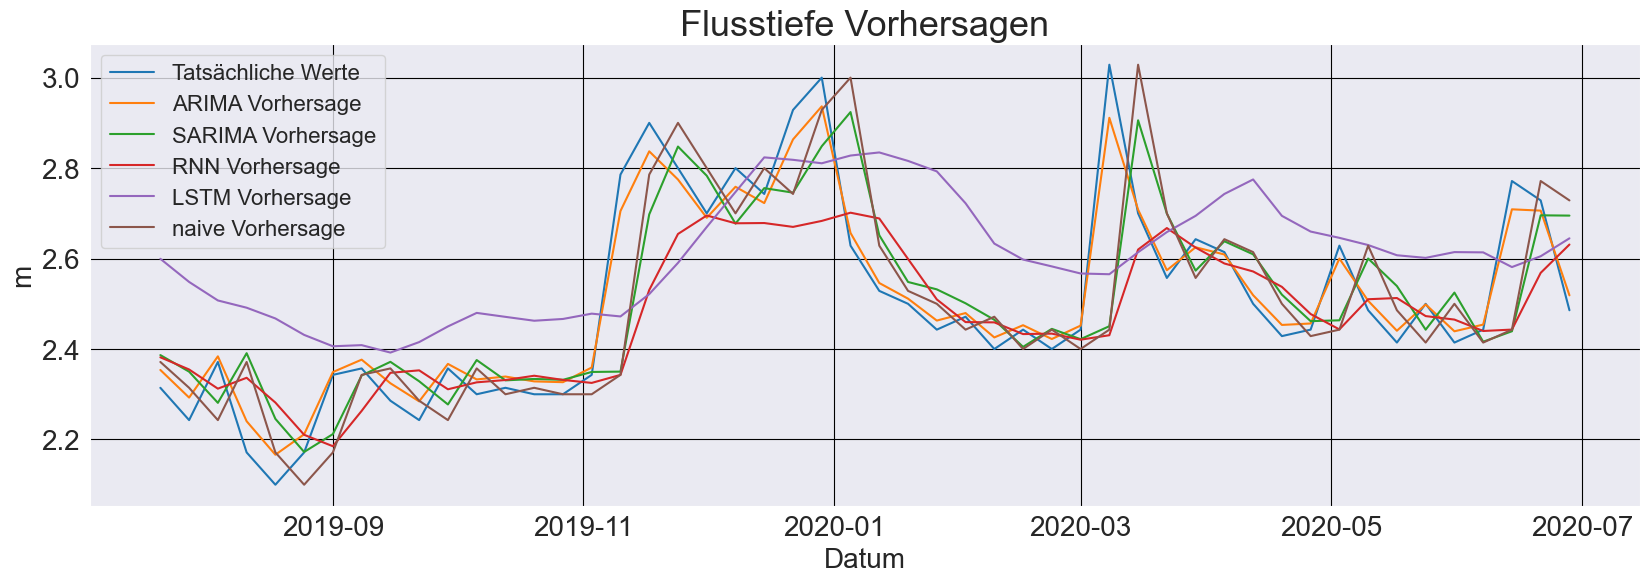

DatetimeIndex(['2019-07-21', '2019-07-28', '2019-08-04', '2019-08-11',
               '2019-08-18', '2019-08-25', '2019-09-01', '2019-09-08',
               '2019-09-15', '2019-09-22', '2019-09-29', '2019-10-06',
               '2019-10-13', '2019-10-20', '2019-10-27', '2019-11-03',
               '2019-11-10', '2019-11-17', '2019-11-24', '2019-12-01',
               '2019-12-08', '2019-12-15', '2019-12-22', '2019-12-29',
               '2020-01-05', '2020-01-12', '2020-01-19', '2020-01-26',
               '2020-02-02', '2020-02-09', '2020-02-16', '2020-02-23',
               '2020-03-01', '2020-03-08', '2020-03-15', '2020-03-22',
               '2020-03-29', '2020-04-05', '2020-04-12', '2020-04-19',
               '2020-04-26', '2020-05-03', '2020-05-10', '2020-05-17',
               '2020-05-24', '2020-05-31', '2020-06-07', '2020-06-14',
               '2020-06-21', '2020-06-28'],
              dtype='datetime64[ns]', name='Date', freq=None)


In [42]:
fig, ax = plt.subplots(figsize=(20, 6))
size = 50
column = 'River_Hydrometry'
index= df_test.iloc[-size:].index
ax.plot(index, df_test[column].iloc[-size:], label='Tatsächliche Werte')
ax.plot(index, pred_arima[column].iloc[-size:], label='ARIMA Vorhersage')
ax.plot(index, pred_sarima[column].iloc[-size:], label='SARIMA Vorhersage')
ax.plot(index, pred_rnn[column].iloc[-size:], label='RNN Vorhersage')
ax.plot(index, pred_lstm[column].iloc[-size:], label='LSTM Vorhersage')
ax.plot(index, pred_naive[column].iloc[-size:], label='naive Vorhersage')
ax.legend( fontsize=16)
ax.set_xlabel('Datum', fontsize=20)
ax.set_ylabel('m',  fontsize=20)
ax.tick_params(axis='both', labelsize=20, grid_color='k')
ax.set_title('Flusstiefe Vorhersagen', fontsize=26)
plt.savefig('graphs/hydro_2.png', format='png', transparent=True)
plt.show()
print(index)

In [24]:
index

Index(['2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27',
       '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01',
       '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', '2020-04-06',
       '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11',
       '2020-04-12', '2020-04-13', '2020-04-14', '2020-04-15', '2020-04-16',
       '2020-04-17', '2020-04-18', '2020-04-19', '2020-04-20', '2020-04-21',
       '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25', '2020-04-26',
       '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01',
       '2020-05-02', '2020-05-03', '2020-05-04', '2020-05-05', '2020-05-06',
       '2020-05-07', '2020-05-08', '2020-05-09', '2020-05-10', '2020-05-11',
       '2020-05-12', '2020-05-13', '2020-05-14', '2020-05-15', '2020-05-16',
       '2020-05-17', '2020-05-18', '2020-05-19', '2020-05-20', '2020-05-21',
       '2020-05-22', '2020-05-23', '2020-05-24', '2020-05-25', '2020-05-26',

In [34]:
print(pd.concat([pred_arima['River_Hydrometry'], pred_sarima['River_Hydrometry']], axis=1))

            River_Hydrometry  River_Hydrometry
2017-01-29          2.831478          2.825329
2017-02-05          2.838014          2.832923
2017-02-12          2.839193          2.859073
2017-02-19          3.055875          3.078601
2017-02-26          2.889114          2.884490
...                      ...               ...
2020-06-07          2.439211          2.416142
2020-06-14          2.454017          2.439287
2020-06-21          2.708864          2.695608
2020-06-28          2.705996          2.694989
2020-07-05          2.518684               NaN

[180 rows x 2 columns]


In [8]:
df = pd.read_csv("./files/scaled_m.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')
saved_df = pd.read_csv("././predictions/LSTM/5.csv", index_col=0)
saved_df.index = pd.to_datetime(saved_df.index, format = '%Y-%m-%d')

In [ ]:
df = pd.read_csv("./files/cycl_data.csv", index_col=0)
df.index = pd.to_datetime(df.index, format = '%Y-%m-%d')

features_sin = ['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'day_sin',
                'month_sin', 'week_of_year_sin', 'quarter_sin', 'season_sin']
features_cos = ['Rainfall', 'Depth_to_Groundwater', 'Temperature', 'Drainage_Volume', 'River_Hydrometry', 'day_cos',
                'month_cos', 'week_of_year_cos', 'quarter_cos', 'season_cos']
delete1 = [feature for feature in df.columns if feature not in features_sin]
delete2 = [feature for feature in df.columns if feature not in features_cos]
df_sin = df.drop(delete1, axis=1)
df_cos = df.drop(delete2, axis=1)

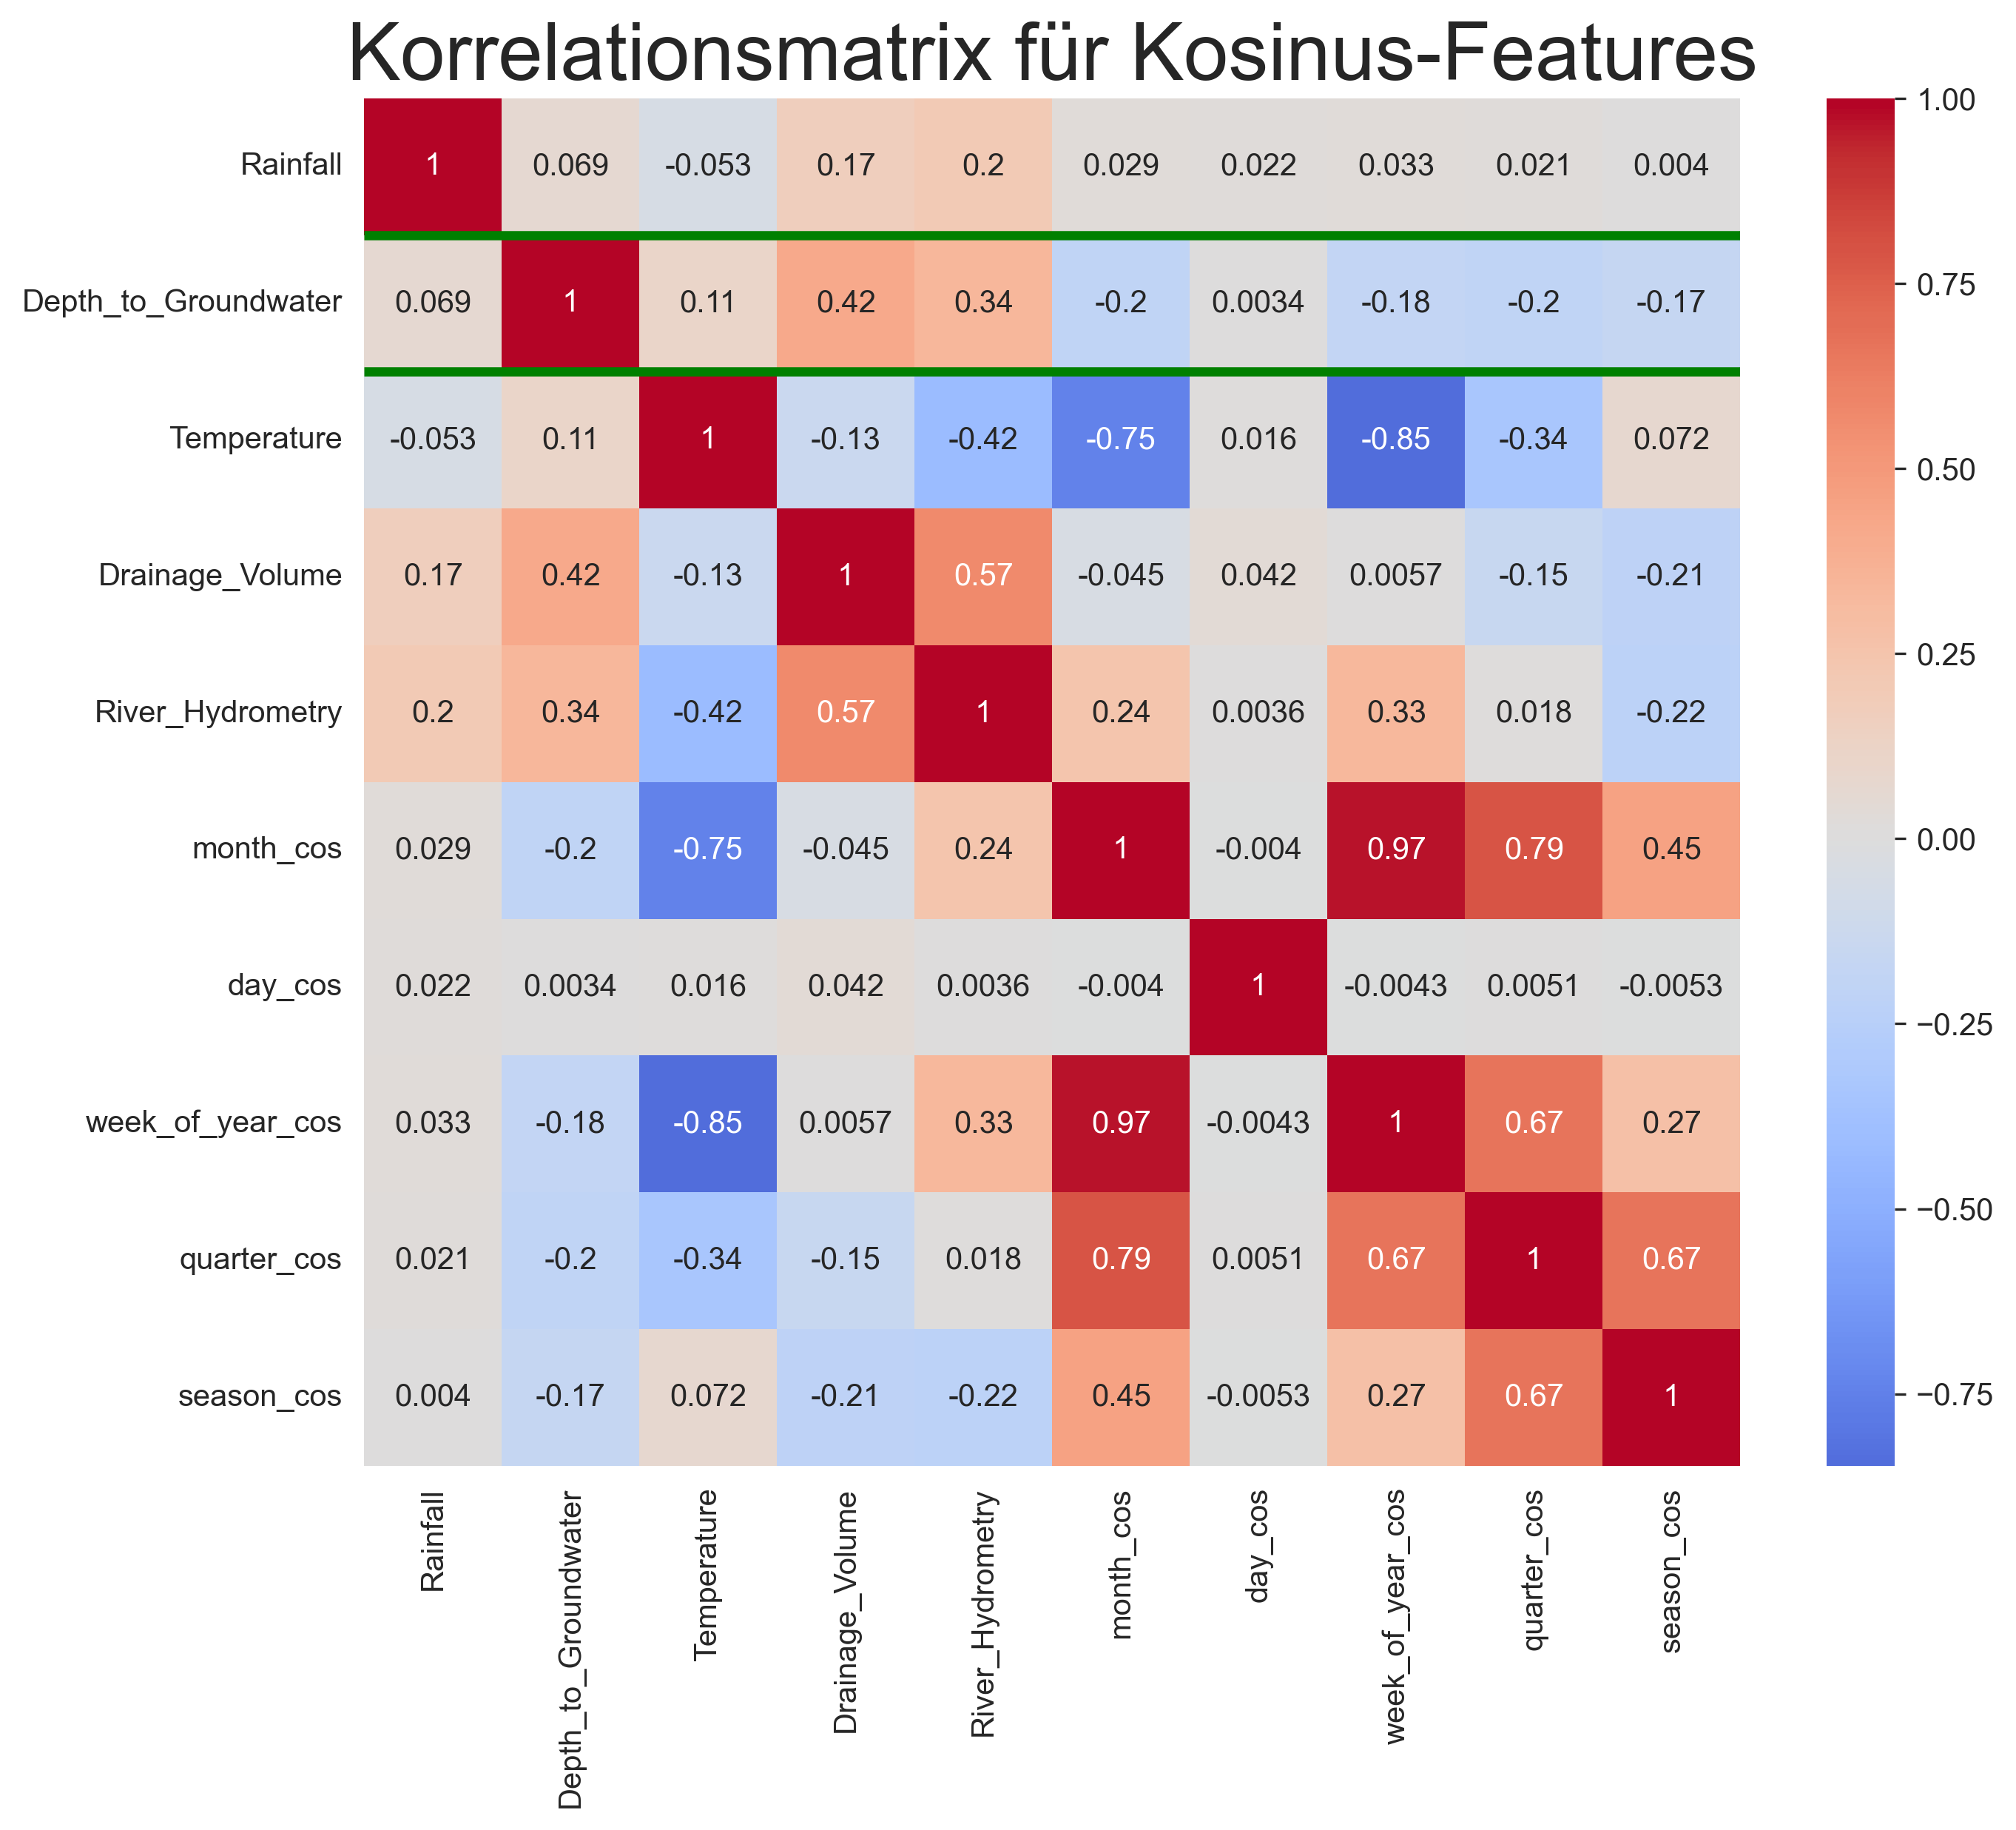

In [22]:

plt.figure(figsize=(10, 8),dpi=300)  # Adjust the figsize as needed
plt.tight_layout()
matrix1 = df_cos.corr()
ax = sns.heatmap(matrix1, cmap='coolwarm', annot=True, center=0)
ax.set_title('Korrelationsmatrix für Kosinus-Features', fontsize=26)
highlighted_row_index = 1  # Ändere dies entsprechend der gewünschten Zeile
ax.hlines(highlighted_row_index, *ax.get_xlim(), colors='green', linewidth=3)
ax.hlines(highlighted_row_index+1, *ax.get_xlim(), colors='green', linewidth=3)
plt.savefig('graphs/corr.png', format='png', transparent=True, bbox_inches='tight')
plt.show()

In [ ]:
matrix2 = df_cos.corr()
sns.heatmap(matrix2, cmap='coolwarm', annot=True)